
# Import libraries

In [5]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version


# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from collections import Counter
from numpy import * 



# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

pandas: 1.3.5
xarray: 0.20.1
geopandas: 1.21.5
tensorflow: 2.0.0
Tensorflow/Keras: 2.2.4-tf
pandas: 1.3.5
sklearn: 1.0.2
plotly: 5.6.0
/Users/3rfanian/P_main


# DATA importing

In [4]:
test_set = pd.read_csv('data_with_newtarget/test_set_with_newtarget.csv')
validation_set = pd.read_csv('data_with_newtarget/validation_set_with_newtarget.csv')
traning_set = pd.read_csv('data_with_newtarget/traning_set_with_newtarget.csv')

#training with yestersay lsm
traning_df = traning_set['newlsm']
traning_df
ndf = traning_df.iloc[1:]
ndf.loc[4268771,] = 0.0
nd = ndf.reset_index()
del nd["index"]
nd =nd.rename(columns={'newlsm': 'Tomorrow_lsm'})
df2 = traning_set.assign(Tomorrow_lsm=nd)
del df2["Unnamed: 0"]

#validation with yestersay lsm
validation_df = validation_set['newlsm']
ndf_val = validation_df.iloc[1:]
ndf_val.loc[688402,] = 0.0
nd_val = ndf_val.reset_index()
del nd_val["index"]
nd_val =nd_val.rename(columns={'newlsm': 'Tomorrow_lsm'})
df3 = validation_set.assign(Tomorrow_lsm=nd_val)
del df3["Unnamed: 0"]


#test with yestersay lsm
test_df = test_set['newlsm']
ndf_test = test_df.iloc[1:]
ndf_test.loc[539487,] = 0.0
nd_test = ndf_test.reset_index()
del nd_test["index"]
nd_test =nd_test.rename(columns={'newlsm': 'Tomorrow_lsm'})
df4 = test_set.assign(Tomorrow_lsm=nd_test)
del df4["Unnamed: 0"]


training_set_wt = df2
validation_set_wt =df3
test_set_wt = df4


##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
#print (x_training)
y_training = training_set_wt[['Tomorrow_lsm']]
print ("******training target******")
#print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
#print (x_test)
y_test = test_set_wt[['Tomorrow_lsm']]
print ("******test target******")
#print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
#print (x_validation)
y_validation = validation_set_wt[['Tomorrow_lsm']]
print ("******validation target******")
#print (y_validation)

******training features******
******training target******
******test features******
******test target******
******validation features******
******validation target******


# ADASYN

In [12]:

print('Before ADASYN')

dff = y_training
M = y_training.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

ada = ADASYN(random_state=1)

X_training_ada, Y_traning_ada = ada.fit_resample(x_training, y_training)

print('After ADASYN')
dff = Y_traning_ada
M = Y_traning_ada.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

Before ADASYN
[0. 1.]
> Class=0 : 4254174/4268771 (99.7%)
> Class=1 : 14597/4268771 (0.3%)
After ADASYN
[0. 1.]
> Class=0 : 4254174/8509691 (50.0%)
> Class=1 : 4255517/8509691 (50.0%)


In [14]:
##### Step 5 - Specify the structure of a Neural Network
model_simple_ADASYN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(1, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_simple_ADASYN.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple_ADASYN.fit(X_training_ada, Y_traning_ada, epochs = 1 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8509691 samples, validate on 688402 samples
8509691/8509691 [==============================] - 1334s 157us/sample - loss: 0.6938 - accuracy: 0.4999 - val_loss: 0.6963 - val_accuracy: 0.0031


In [15]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_ADASYN = (model_simple_ADASYN.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_ADASYN = (model_simple_ADASYN.predict(x_test))
#> 0.01).astype(int)


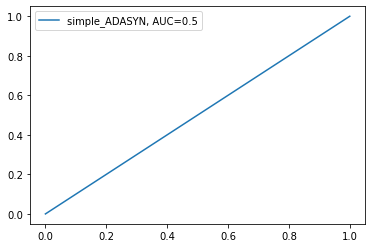

In [16]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_ADASYN)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_ADASYN), 4)
plt.plot(fpr,tpr,label="simple_ADASYN, AUC="+str(auc))





#add legend
plt.legend()